# 2 Training Simple Machine Learning Algorithms for Classification

Decision function
$$
\sigma(z) = 
\begin{cases}
1,~z > \theta \\
0,~\text{otherwise}
\end{cases}
$$

Output $z = \bf{w}^{T}\bf{x} +b $

In [33]:
import numpy as np
from sklearn.datasets import load_iris
from tqdm import tqdm

X, y = load_iris(return_X_y=True)


class PercepTron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.0)
        self.errors_ = []

        for _ in tqdm(range(self.n_iter)):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

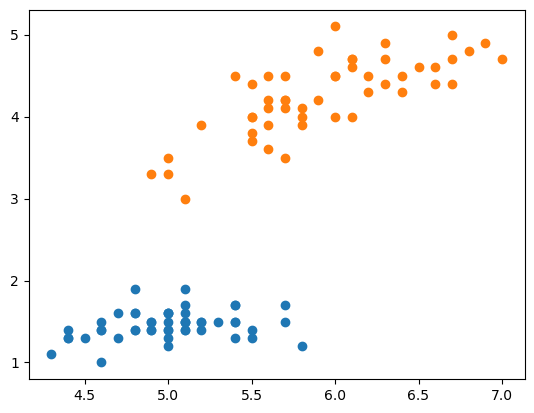

In [30]:
import matplotlib.pyplot as plt

y[:100], X[:100, [0, 2]]

plt.scatter(X[:50, 0], X[:50, 2])
plt.scatter(X[50:100, 0], X[50:100, 2])

100%|██████████| 20/20 [00:00<00:00, 1062.13it/s]


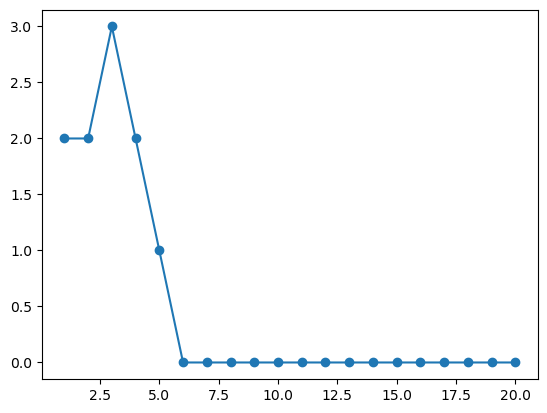

In [36]:
model = PercepTron(eta=0.1, n_iter=20)

model.fit(X[:100, [0, 2]], y)

plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker="o")
plt.show()

In [38]:
model.w_

array([-0.35375655,  0.91388244])